In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import spatial
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#read in data
x_train = np.genfromtxt("/Users/rebecca.peyser/Documents/Columbia_DSI/machinelearning/HW/Homework 3/hw3-data/gaussian_process/X_train.csv", delimiter = ",")
y_train = np.genfromtxt("/Users/rebecca.peyser/Documents/Columbia_DSI/machinelearning/HW/Homework 3/hw3-data/gaussian_process/y_train.csv", delimiter = ",")
x_test = np.genfromtxt("/Users/rebecca.peyser/Documents/Columbia_DSI/machinelearning/HW/Homework 3/hw3-data/gaussian_process/X_test.csv", delimiter = ",")
y_test = np.genfromtxt("/Users/rebecca.peyser/Documents/Columbia_DSI/machinelearning/HW/Homework 3/hw3-data/gaussian_process/y_test.csv", delimiter = ",")

In [3]:
def gaussian_kernel_mat(b, x_mat): 
    dist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(x_mat, metric='euclidean')) #calculates pairwise distance between rows of matrix
    return(np.exp(-1*np.square(dist_mat)/b))

In [4]:
def kernel_x_Dn(b, x_new, x_mat):
    x_new = x_new.reshape(1,-1)
    dist_vec = scipy.spatial.distance.cdist(x_new, x_mat, metric='euclidean') #calculates distance between x_new and each observation (row) in x_mat
    return(np.exp(-1*np.square(dist_vec)/b))

In [5]:
def predict(x_new, b, sigma_sq, x_measured, y_measured):
        K_x_Dn = kernel_x_Dn(b, x_new, x_measured)
        #print(K_x_Dn)
        K_n = gaussian_kernel_mat(b, x_measured)
        inv = np.linalg.inv(sigma_sq*np.eye(len(x_train)) + K_n)
        #print(inv)
        y_measured = y_measured.reshape(-1, 1)
        #print(y_measured)
        mean = np.dot(np.dot(K_x_Dn, inv), y_measured)
        return(mean)

In [55]:
## get predictions and RMSE
bs = [5,7,9,11,13,15]
sigma_sqs = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
RMSE_table = np.zeros([len(bs), len(sigma_sqs)]) #hold prediction in 3d array [b, sig, y]
for i_b, b in enumerate(bs):
    for i_s, sigmasq in enumerate(sigma_sqs):
        prediction = np.apply_along_axis(predict, 1, x_test, b, sigmasq, x_train, y_train)
        prediction = prediction.reshape(len(x_test),) #reshape prediction to match shape of y_test (column vec) so can subtract
        error = np.subtract(y_test, prediction)
        RMSE = np.sqrt(np.mean(np.square(error)))
        RMSE_table[i_b,i_s] = RMSE

In [48]:
#print RMSE for each b/sigma combination
pd.DataFrame(RMSE_table, index = bs, columns = sigma_sqs)

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966276,1.933135,1.923420,1.922198,1.924769,1.929213,1.934634,1.940583,1.946820,1.953213
7,1.920163,1.904877,1.908080,1.915902,1.924804,1.933701,1.942254,1.950380,1.958093,1.965438
9,1.897649,1.902519,1.917648,1.932514,1.945699,1.957235,1.967403,1.976492,1.984741,1.992341
11,1.890507,1.914981,1.938849,1.957936,1.973216,1.985764,1.996375,2.005603,2.013835,2.021345
13,1.895849,1.935586,1.964597,1.985502,2.001314,2.013878,2.024310,2.033307,2.041317,2.048642
15,1.909603,1.959549,1.990804,2.011915,2.027370,2.039465,2.049463,2.058105,2.065845,2.072976


In [7]:
#part d - visualize 4th dimension
fourth_predictions  = np.apply_along_axis(predict, 1, x_train[:,3].reshape(-1,1), 5, 2, x_train[:,3].reshape(-1,1), y_train)
fourth_predictions = fourth_predictions.reshape(350,)

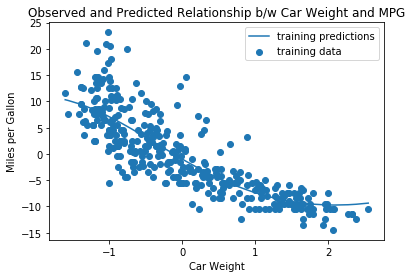

In [8]:
plt.scatter(x_train[:,3], y_train)
#plt.scatter(x_test[:,3], y_test)
plt.plot(np.sort(x_train[:,3]), fourth_predictions[np.argsort(x_train[:,3])])
plt.legend(['training predictions', 'training data'])
plt.xlabel('Car Weight')
plt.ylabel('Miles per Gallon')
plt.title('Observed and Predicted Relationship b/w Car Weight and MPG')
plt.show()


In [28]:
##Just for fun - visualize Gaussian process

xs = np.linspace(-5,5,300).reshape(300,1)
K = gaussian_kernel_mat(0.1,xs)
sampled_fs = np.random.multivariate_normal(np.zeros(len(xs)),K)
print(sampled_fs.shape)
plt.plot(xs, sampled_fs.T)

(300,)


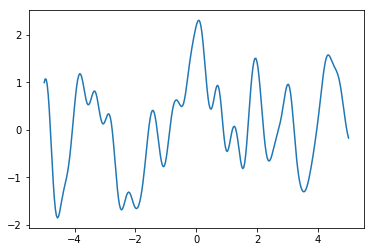

In [29]:
plt.show()

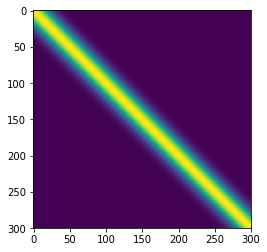

In [82]:
plt.imshow(K)